In [1]:
from __future__ import print_function
import os
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ["RNB_PLANNING_DIR"], "src"))
from pkg.controller.trajectory_client.indy_trajectory_client import IndyTrajectoryClient
from pkg.utils.utils import *
from pkg.utils.traj_utils import calc_safe_trajectory
import numpy as np

In [2]:
indy = IndyTrajectoryClient("192.168.21.6")

In [3]:
traj = load_pickle("traj.pkl")

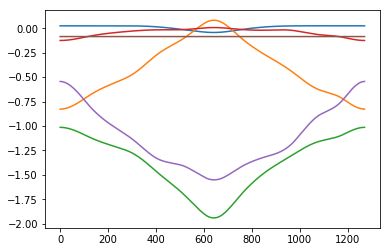

In [4]:
plt.plot(traj)

In [6]:
Qcur = indy.get_qcur()

In [7]:
indy.joint_move_make_sure(Qcur)

Connect: Server IP (192.168.21.6)
Connect: Server IP (192.168.21.6)


In [8]:
indy.joint_move_make_sure(traj[0])

Connect: Server IP (192.168.21.6)
Connect: Server IP (192.168.21.6)


In [ ]:
traj_go = traj[::2]
while True:
    indy.move_joint_traj(traj_go, auto_stop=False, wait_motion=True)
    # sleep_time = len(traj_go)*2e-2+1
    # print("sleep start: {:05} s".format(sleep_time))
    # time.sleep(sleep_time)
    print("sleep end")
    while True:
        qcount = indy.get_qcount()
        if qcount == 0:
            break
        print("qcount : {}".format(qcount))
        time.sleep(0.1)

sleep end
sleep end
sleep end
sleep end


In [7]:
indy.q_start_time

In [5]:
indy.stop_tracking()

Connect: Server IP (192.168.21.6)


{'stop': True}

In [ ]:
indy.SURE_MOTION_DCP = True

In [13]:
print("{}".format([1,2]))

[1, 2]


In [8]:
np.rad2deg(8e-2)

4.583662361046586

In [6]:
Qlist = []

In [11]:
Qlist.append(indy.get_qcur())

Connect: Server IP (192.168.21.6)


In [12]:
Qlist = Qlist + list(reversed(Qlist))

In [24]:
Qlist = list(traj[::100]) + [traj[0]]

In [26]:
t_list, traj = calc_safe_trajectory(2e-2, Qlist, 0.1,0.1)

In [5]:
# save_pickle("traj.pkl", traj)